# CMIP6 Historical model runs
This script opens up all the CMIP6 historical model run files with data on precipitation pr and surface temperature tas and loops over the files.


In [1]:
import xarray as xr, matplotlib.pyplot as plt
#import sys 
#sys.path.append('') # use this if the function file is in a different directory to the notebook
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????

In [2]:
# import custom functions
import anomaly_function as func # imports the function
import model_figures as func2

In [3]:
# use this to reload the function file if I make any edits to it
func = reload(func) 
func2 = reload(func2)

In [4]:
!ls /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/pr/gr1.5

v20200302


In [5]:
# store each section of the directory as a string
institution_dir = '/g/data/lp01/CMIP6/CMIP/'
tas_dir = '/historical/r1i1p1f1/Amon/tas/gr1.5/'
pr_dir = '/historical/r1i1p1f1/Amon/pr/gr1.5/'
print(institution_dir, tas_dir, pr_dir)

/g/data/lp01/CMIP6/CMIP/ /historical/r1i1p1f1/Amon/tas/gr1.5/ /historical/r1i1p1f1/Amon/pr/gr1.5/


## Read in model data

In [6]:
models_tas = func.read_models(institution_dir, tas_dir, '1850-01','2015-01')

46 model paths found and loaded into the dictionary "models"
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/tas/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190630/*.nc
Path for MCM-UA-1-0 does not exist
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/tas/gr1.5/v20190919/*.nc
Model MPI-ESM1-2-HR has different time so is now removed
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20180803/*.nc
CAS-ESM2-0 /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/tas/gr1.5/v20200302/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/tas/gr1.5/v20190927/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190818/*.nc
BCC-ESM1 

In [7]:
models_pr = func.read_models(institution_dir, pr_dir, '1850-01','2015-01')

45 model paths found and loaded into the dictionary "models"
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/pr/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/pr/gr1.5/v20190630/*.nc
Path for MCM-UA-1-0 does not exist
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/pr/gr1.5/v20190919/*.nc
MPI-ESM1-2-HR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Amon/pr/gr1.5/v20190710/*.nc
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/pr/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/pr/gr1.5/v20180803/*.nc
CAS-ESM2-0 /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/pr/gr1.5/v20200302/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/pr/gr1.5/v20190927/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p

In [8]:
# make sure the models are the same for both vairables
# delete the height from the models_tas array (if it hasn't been deleted already)
if 'height' in models_tas:
    del models_tas['height']
# delete models that aren't common between variables
models_tas = models_tas.where(models_tas.model.isin(models_pr.model), drop = True)
models_pr = models_pr.where(models_pr.model.isin(models_tas.model), drop = True)
#chekc that the models are the same for both variables and if so print True
models_tas.model.equals(models_pr.model)

True

In [9]:
# combine precipitation and temperature into one dataset
models = xr.Dataset({'tas': models_tas.tas, 'pr': models_pr.pr})
# change the pr units
models['pr'] = models.pr*86400
models

,Array,Chunk
Bytes,9.35 GB,228.10 MB
Shape,"(41, 1980, 120, 240)","(1, 1980, 120, 240)"
Count,333 Tasks,41 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,18.70 GB,456.19 MB
Shape,"(41, 1980, 120, 240)","(1, 1980, 120, 240)"
Count,382 Tasks,41 Chunks
Type,float64,numpy.ndarray


In [10]:
# sort models alphabetically and prints final model list
models = models.sortby('model')
print(models.model.data)

['ACCESS-CM2' 'ACCESS-ESM1-5' 'AWI-CM-1-1-MR' 'AWI-ESM-1-1-LR'
 'BCC-CSM2-MR' 'BCC-ESM1' 'CAMS-CSM1-0' 'CAS-ESM2-0' 'CESM2' 'CESM2-FV2'
 'CESM2-WACCM' 'CESM2-WACCM-FV2' 'CIESM' 'CMCC-CM2-SR5' 'CanESM5'
 'E3SM-1-1' 'E3SM-1-1-ECA' 'EC-Earth3' 'EC-Earth3-Veg-LR' 'FGOALS-f3-L'
 'FGOALS-g3' 'FIO-ESM-2-0' 'GFDL-CM4' 'GFDL-ESM4' 'GISS-E2-1-G'
 'GISS-E2-1-G-CC' 'GISS-E2-1-H' 'INM-CM4-8' 'INM-CM5-0' 'IPSL-CM6A-LR'
 'KACE-1-0-G' 'MIROC6' 'MPI-ESM-1-2-HAM' 'MPI-ESM1-2-LR' 'MRI-ESM2-0'
 'NESM3' 'NorCPM1' 'NorESM2-LM' 'NorESM2-MM' 'SAM0-UNICON' 'TaiESM1']


In [11]:
# # get rid of new model
# models = models.drop_sel(model=['TaiESM1'])

## Select out regions
Right now I have all the models stored in one array so from hereafter I can calculate anomalies etc.  

In [12]:
# area weighting 
models_w = models*np.cos(models_tas.lat*(np.pi/180))

In [13]:
# select out the northern and sourhern hemisphere regions
models_SH = models_w.sel(lat=slice(-90,0))
models_NH = models_w.sel(lat=slice(0,90))


In [14]:
# import land fraction data
landfrac_ds = xr.open_dataset('/home/563/kb6999/Models/landfraction_file_grid1.5.nc')
landmask = landfrac_ds.mean(dim='time')

In [15]:
# this is where I use the land mask and select out the continents
models_w_land = models_w.where(landmask.data==1, drop=True)

In [16]:
# here I select the Australia region with a lon,lat box and the Eastern Australia region
models_aus = models_w_land.sel(lat=slice(-50,-10), lon=slice(110,160)) 
models_EAus = models_w_land.sel(lat=slice(-50,-10), lon=slice(140,155))

## Anomalies

In [17]:
# use functions to calculate the monthly and seasonal anomalies for the globe
# global
# monthly
monthly_anom_glob = func.monthly_anomaly(models_w, '1850-01', '1881-01')
# seasonal
seasonal_anom_glob = func.seasonal_anomaly(models_w, '1850-01', '1881-01')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]


In [18]:
# use functions to calculate the monthly and seasonal anomalies for hemispheres
# NH
monthly_anom_NH = func.monthly_anomaly(models_NH, '1850-01', '1881-01')
seasonal_anom_NH = func.seasonal_anomaly(models_NH, '1850-01', '1881-01')
# SH
monthly_anom_SH = func.monthly_anomaly(models_SH, '1850-01', '1881-01')
seasonal_anom_SH = func.seasonal_anomaly(models_SH, '1850-01', '1881-01')


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]


In [21]:
# # checking if this is working properly
# # group the data into months
# variable_monthly = models_aus.groupby('time.month')

# # calculate the mean climatology along each month for the time period 1850-1900 
# clim_monthly = models_aus.sel(time = slice('1850-01', '1881-01')).groupby('time.month').mean(dim = 'time')

# # caclulate the anomalies for each month and return it as an array
# multi_monthly_anom = (variable_monthly - clim_monthly)

# clim_monthly

# Kernel keeps dying at the cell below and IDK WHYYYY!!!!!


In [6]:
hello = [['hel', 'hel'],['hel', 'hel']]
lo = [['lo','lo'],['lo','lo']]


In [7]:

for idx, val in enumerate(hello):
    sum1 = hello[idx]+lo[idx]
    print(sum1)

['hel', 'hel', 'lo', 'lo']
['hel', 'hel', 'lo', 'lo']


In [22]:
# use functions to calculate the monthly and seasonal anomalies for aus and E aus
# Australia 
monthly_anom_Aus = func.monthly_anomaly(models_aus, '1850-01', '1881-01')
seasonal_anom_Aus = func.seasonal_anomaly(models_aus, '1850-01', '1881-01')

# East Australia
monthly_anom_EA = func.monthly_anomaly(models_EAus, '1850-01', '1881-01')
seasonal_anom_EA = func.seasonal_anomaly(models_EAus, '1850-01', '1881-01')


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]


In [23]:
# take the mean in longitude and latitude for each model
# monthly
mean_mon_Glob = monthly_anom_glob.mean(dim=('lat','lon'))
mean_mon_NH = monthly_anom_NH.mean(dim=('lat','lon'))
mean_mon_SH = monthly_anom_SH.mean(dim=('lat','lon'))
mean_mon_Aus = monthly_anom_Aus.mean(dim=('lat','lon'))
mean_mon_EA = monthly_anom_EA.mean(dim=('lat','lon'))

# Seasonal
mean_seasonal_Glob = seasonal_anom_glob.mean(dim=('lat','lon'))
mean_seasonal_NH = seasonal_anom_NH.mean(dim=('lat','lon'))
mean_seasonal_SH = seasonal_anom_SH.mean(dim=('lat','lon'))
mean_seasonal_Aus = seasonal_anom_Aus.mean(dim=('lat','lon'))
mean_seasonal_EA = seasonal_anom_EA.mean(dim=('lat','lon'))

In [22]:
# calculate the percentiles and then take the mean along the model dimension for monthly anomalies
# 10th percentile
p10_mon_Glob = mean_mon_Glob.chunk({'model': -1}).quantile(0.1, dim=['model']) # this one is right
p10_mon_NH = mean_mon_NH.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_mon_SH = mean_mon_SH.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_mon_Aus = mean_mon_Aus.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_mon_EA = mean_mon_EA.chunk({'model': -1}).quantile(0.1, dim=['model'])

# 90th percentile
p90_mon_Glob = mean_mon_Glob.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_mon_NH = mean_mon_NH.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_mon_SH = mean_mon_SH.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_mon_Aus = mean_mon_Aus.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_mon_EA = mean_mon_EA.chunk({'model': -1}).quantile(0.9, dim=['model'])


In [23]:
# calculate the percentiles and then take the mean along the model dimension for seasonal anomalies
# 10th percentile
p10_seasonal_Glob = mean_seasonal_Glob.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_seasonal_SH = mean_seasonal_SH.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_seasonal_Aus = mean_seasonal_Aus.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_seasonal_EA = mean_seasonal_EA.chunk({'model': -1}).quantile(0.1, dim=['model'])

# 90th percentile
p90_seasonal_Glob = mean_seasonal_Glob.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_seasonal_NH = mean_seasonal_NH.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_seasonal_SH = mean_seasonal_SH.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_seasonal_Aus = mean_seasonal_Aus.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_seasonal_EA = mean_seasonal_EA.chunk({'model': -1}).quantile(0.9, dim=['model'])


In [24]:
# calculate the multi model mean 
# monthly
mmm_mon_Glob = mean_mon_Glob.mean(dim='model')
mmm_mon_NH = mean_mon_NH.mean(dim='model')
mmm_mon_SH = mean_mon_SH.mean(dim='model')
mmm_mon_Aus = mean_mon_Aus.mean(dim='model')
mmm_mon_EA = mean_mon_EA.mean(dim='model')

# seasonal
mmm_seasonal_Glob = mean_seasonal_Glob.mean(dim='model')
mmm_seasonal_NH = mean_seasonal_NH.mean(dim='model')
mmm_seasonal_SH = mean_seasonal_SH.mean(dim='model')
mmm_seasonal_Aus = mean_seasonal_Aus.mean(dim='model')
mmm_seasonal_EA = mean_seasonal_EA.mean(dim='model')

In [25]:
# calculate the standard deviation for each model over the time period from 1850-1880
std_Glob = mean_mon_Glob.sel(time = slice('1850-01', '1881-01')).std(dim = ['time'])
std_SH = mean_mon_SH.sel(time = slice('1850-01', '1881-01')).std(dim = ['time'])
std_Aus = mean_mon_Aus.sel(time = slice('1850-01', '1881-01')).std(dim = ['time'])
std_EA = mean_mon_EA.sel(time = slice('1850-01', '1881-01')).std(dim = ['time'])

In [62]:
# calculate the mmm plus/minus std for monthly anom
std_mon_Glob = func.std_bounds(mean_mon_Glob, mmm_mon_Glob)
std_mon_NH = func.std_bounds(mean_mon_NH, mmm_mon_NH)
std_mon_SH = func.std_bounds(mean_mon_SH, mmm_mon_SH)
std_mon_Aus = func.std_bounds(mean_mon_Aus, mmm_mon_Aus)
std_mon_EA = func.std_bounds(mean_mon_EA, mmm_mon_EA)


## Figures

In [63]:
func2 = reload(func2)

In [64]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

# add in plt.tight_layout() to prevent labels overlapping etc.
# do we want to share the labels?? ie sharex sharey?

NameError: name 'p10_mon_Glob' is not defined

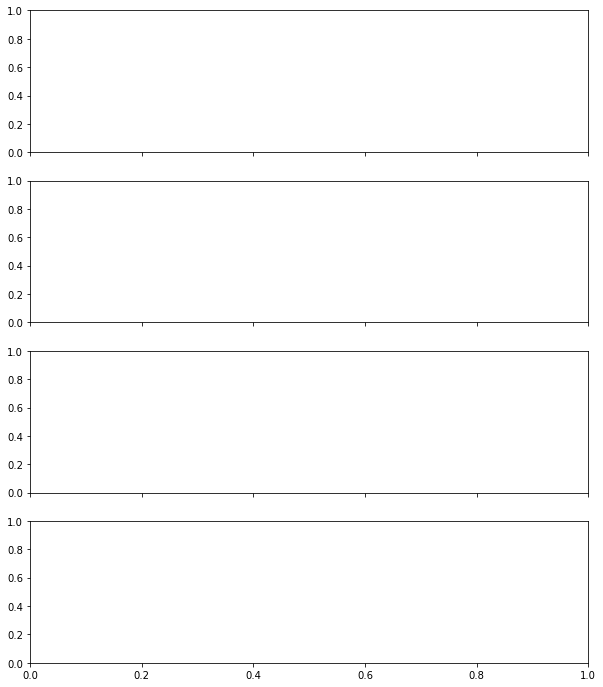

In [65]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(10,12)) # make a figure

func2.timeseries_graph(mmm_mon_Glob.tas, p10_mon_Glob.tas, p90_mon_Glob.tas, ax = axes[0], color='lightcoral')
func2.timeseries_graph(mmm_mon_SH.tas, p10_mon_SH.tas, p90_mon_SH.tas, ax = axes[1], color='lightcoral')
func2.timeseries_graph(mmm_mon_Aus.tas, p10_mon_Aus.tas, p90_mon_Aus.tas, ax = axes[2], color='lightcoral')
func2.timeseries_graph(mmm_mon_EA.tas, p10_mon_EA.tas, p90_mon_EA.tas, ax = axes[3], color='lightcoral')

# set axis labels and subplot titles
axes[0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[1].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Southern Hemisphere')
axes[2].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[3].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Eastern Australia')

fig.suptitle('Time series of temperature anomalies', size=16)

fig.tight_layout() # stops things from overlapping and makes the figure more compact

plt.savefig('timeseries_mon_tas_stacked.png', dpi=300, bbox_inches='tight')

## need to add sharex=True, sharey=True, or tight layout so the axes labels don't overlap

In [ ]:
# same plot but stacked rather than 2x2
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(10,12)) # make a figure

func2.timeseries_graph(mmm_mon_Glob.pr, p10_mon_Glob.pr, p90_mon_Glob.pr, ax = axes[0], color='lightblue')
func2.timeseries_graph(mmm_mon_SH.pr, p10_mon_SH.pr, p90_mon_SH.pr, ax = axes[1], color='lightblue')
func2.timeseries_graph(mmm_mon_Aus.pr, p10_mon_Aus.pr, p90_mon_Aus.pr, ax = axes[2], color='lightblue')
func2.timeseries_graph(mmm_mon_EA.pr, p10_mon_EA.pr, p90_mon_EA.pr, ax = axes[3], color='lightblue')

# set axis labels and subplot titles
axes[0].set(ylabel= 'Precipitation anomaly [mm/day]', title = 'Global') 
axes[1].set(ylabel= 'Precipitation anomaly [mm/day]', title = 'Southern Hemisphere')
axes[2].set(ylabel= 'Precipitation anomaly [mm/day]', title = 'Australia')
axes[3].set(ylabel= 'Precipitation anomaly [mm/day]', title = 'Eastern Australia')

fig.suptitle('Time series of precipitation anomalies', size=16)

fig.tight_layout() # stops things from overlapping and makes the figure more compact

plt.savefig('timeseries_mon_pr_stacked.png', dpi=300, bbox_inches='tight')


In [ ]:
# eruption date
e_date = ['1883-08','1902-10', '1963-03', '1982-04', '1991-06']
e_pre5yrs = ['1878-08','1897-10', '1958-03', '1977-04', '1986-06']
e_pre3mon = ['1883-05','1902-7', '1962-12', '1982-01', '1991-03']
e_post5yrs = ['1888-08','1907-10', '1968-03', '1987-04', '1996-06']
e_post10yrs = ['1893-08','1912-10', '1973-03', '1992-04', '2001-06']

In [ ]:
# Zoom in on Krakatoa time period
K_mmm_mon_Glob = mmm_mon_Glob.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_mon_SH = mmm_mon_SH.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_mon_Aus = mmm_mon_Aus.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_mon_EA = mmm_mon_EA.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))

K_p10_mon_Glob = p10_mon_Glob.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_mon_SH = p10_mon_SH.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_mon_Aus = p10_mon_Aus.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_mon_EA = p10_mon_EA.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))

K_p90_mon_Glob = p90_mon_Glob.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_mon_SH = p90_mon_SH.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_mon_Aus = p90_mon_Aus.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_mon_EA = p90_mon_EA.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))

In [ ]:
# Monthly temperature anomalies for Krakatoa
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10)) # make a figure

# make subplots for each region
func2.timeseries_graph(K_mmm_mon_Glob.tas, K_p10_mon_Glob.tas, K_p90_mon_Glob.tas, ax = axes[0,0],color='lightcoral')
func2.timeseries_graph(K_mmm_mon_SH.tas, K_p10_mon_SH.tas, K_p90_mon_SH.tas, ax = axes[0,1], color='lightcoral')
func2.timeseries_graph(K_mmm_mon_Aus.tas, K_p10_mon_Aus.tas, K_p90_mon_Aus.tas, ax = axes[1,0], color='lightcoral')
func2.timeseries_graph(K_mmm_mon_EA.tas, K_p10_mon_EA.tas, K_p90_mon_EA.tas, ax = axes[1,1], color='lightcoral')

# set axis labels and subplot titles
axes[0,0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[1,1].set(title = 'Eastern Australia')

fig.suptitle('10-year time series of temperature anomalies', size=16)

fig.tight_layout() # stops things from overlapping and makes the figure more compact

plt.savefig('K_timeseries_mon_tas.png', dpi=300, bbox_inches='tight')

In [ ]:
K_mmm_mon_Glob

## still trying to get the axis ticks for each month

In [ ]:
# Monthly precipitation anomalies for Krakatoa
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10)) # make a figure

# make subplots for each region
func2.timeseries_graph(K_mmm_mon_Glob.pr, K_p10_mon_Glob.pr, K_p90_mon_Glob.pr, ax = axes[0,0], color='lightblue')
func2.timeseries_graph(K_mmm_mon_SH.pr, K_p10_mon_SH.pr, K_p90_mon_SH.pr, ax = axes[0,1], color='lightblue')
func2.timeseries_graph(K_mmm_mon_Aus.pr, K_p10_mon_Aus.pr, K_p90_mon_Aus.pr, ax = axes[1,0], color='lightblue')
func2.timeseries_graph(K_mmm_mon_EA.pr, K_p10_mon_EA.pr, K_p90_mon_EA.pr, ax = axes[1,1], color='lightblue')

# set axis labels and subplot titles
axes[0,0].set(ylabel='Precipitation anomaly [mm/day]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(ylabel='Precipitation anomaly [mm/day]', title = 'Australia')
axes[1,1].set(title = 'Eastern Australia')

# set's the axis ticks 12 months apart
#axes[0,0].set_xticks(np.arange(min(K_mmm_mon_Glob.time.values), max(K_mmm_mon_Glob.time.values)))#, minor = True)

fig.suptitle('10-year time series of precipitation anomalies', size=16)

fig.tight_layout() # stops things from overlapping and makes the figure more compact

plt.savefig('K_timeseries_mon_pr.png', dpi=300, bbox_inches='tight')

In [ ]:
print(min(K_mmm_mon_Glob.time.values))

## Seasonal anomaly calculations for figures


In [ ]:
# select the anomaly for each season

anom_djf = mean_seasonal.sel(season = 'DJF')
anom_mam = mean_seasonal.sel(season = 'MAM')
anom_jja = mean_seasonal.sel(season = 'JJA')
anom_son = mean_seasonal.sel(season = 'SON')

In [ ]:
mmm_djf = mmm_seasonal.sel(season = 'DJF')
mmm_mam = mmm_seasonal.sel(season = 'MAM')
mmm_jja = mmm_seasonal.sel(season = 'JJA')
mmm_son = mmm_seasonal.sel(season = 'SON')